# Pandas básico

In [1]:
import pandas as pd

BASE = r"./dados/cereal_sem_negativos.csv"

df = pd.read_csv(BASE)

df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     int64  
 10  potass    74 non-null     int64  
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.4+ KB


,Quantidade
mfr,
K,23
G,22
P,9
Q,7
R,7
N,5
A,1


<Axes: xlabel='mfr'>

mfr,Quantidade
K,23
G,22
P,9
Q,7
R,7
N,5
A,1


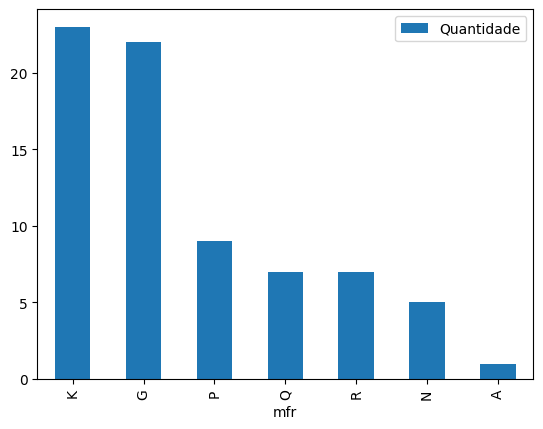

In [3]:
dados_plot = df["mfr"].value_counts().to_frame().rename(columns={"count": "Quantidade"})
display(dados_plot)
display(dados_plot.plot(kind="bar"))
display(dados_plot.reset_index().style.hide().bar(color=['#d65f5f', '#5fba7d']))

<Axes: title={'center': 'Contagem de cereais por fabricante'}, xlabel='Fabricante', ylabel='Quantidade'>

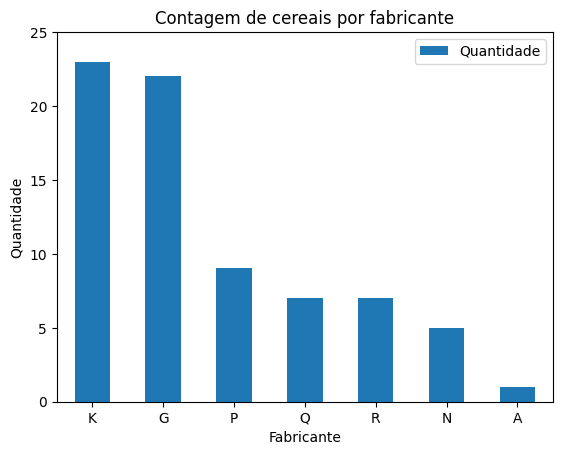

In [4]:
display(
    dados_plot.plot(
        kind="bar",
        xlabel="Fabricante",
        ylabel="Quantidade",
        title="Contagem de cereais por fabricante",
        ylim=(0, 25),
        legend="Quantidade",
        rot=True
        )
)

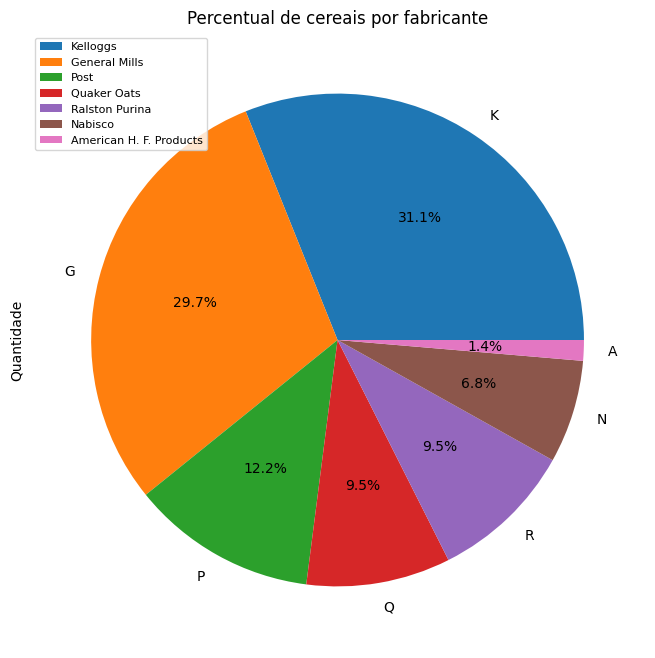

In [5]:
import matplotlib.pyplot as plt

dados_plot.plot(
    kind="pie",
    y="Quantidade",
    title="Percentual de cereais por fabricante",
    autopct="%.1f%%",
    figsize=(8, 8), 
)
plt.legend(["Kelloggs","General Mills", "Post", "Quaker Oats", "Ralston Purina", "Nabisco", "American H. F. Products"], prop={"size": 8})


<Axes: title={'center': 'Média de calorias por fabricante'}, xlabel='Fabricante', ylabel='Quantidade'>

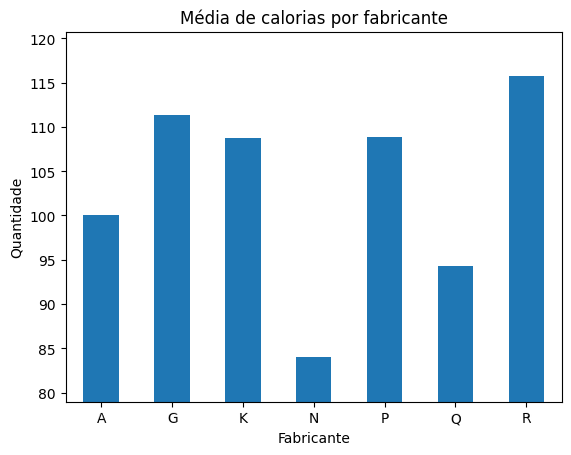

In [6]:
dados_calorias = df.groupby("mfr")["calories"].mean()

dados_calorias.plot(
    kind="bar",
    xlabel="Fabricante",
    ylabel="Quantidade",
    title="Média de calorias por fabricante",
    ylim=(dados_calorias.min() - 5, dados_calorias.max() + 5),
    rot=True
)